# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Rendika Nurhartanto Suharto
- **Email:** rendikarendi96@gmail.com
- **ID Dicoding:** RENDIKA NURHARTANTO SUHARTO

## **Menentukan Pertanyaan Bisnis**

<h3><strong>Pertanyaan Bisnis 1:</strong> Bagaimana perbandingan tingkat kepuasan pelanggan berdasarkan rating review dengan kategori produk pada tahun 2017?</h3>

- **Specific:** Fokus pada perbandingan rating review dan kategori produk.
- **Measurable:** Dapat diukur dengan menghitung jumlah rating review per kategori produk dan menganalisis rata-rata skor.
- **Action-oriented:** Informasi ini bisa digunakan untuk meningkatkan pengalaman pelanggan berdasarkan kategori produk yang mendapatkan skor rendah.
- **Relevant:** Berdasarkan data transaksi dan feedback pelanggan, ini relevan untuk menilai kualitas produk dan pengalaman pengguna.
- **Time-bound:** Data terbatas pada tahun 2017.

<h3><strong>Pertanyaan Bisnis 2:</strong> Apa saja faktor yang mempengaruhi waktu pengiriman produk, dan bagaimana pengaruhnya terhadap kepuasan pelanggan pada periode 2017?</h3>

- **Specific:** Fokus pada waktu pengiriman dan faktor-faktor yang mempengaruhi kepuasan pelanggan.
- **Measurable:** Dapat diukur dengan melihat waktu pengiriman dan skor review untuk mengetahui kepuasan pelanggan.
- **Action-oriented:** Data ini akan membantu merencanakan perbaikan dalam pengiriman produk dan strategi pemenuhan untuk meningkatkan kepuasan pelanggan.
- **Relevant:** Mengetahui hubungan antara waktu pengiriman dan kepuasan pelanggan akan memberikan insight untuk strategi pengiriman yang lebih efisien.
- **Time-bound:** Hanya menggunakan data dari periode 2017.

## **Import Semua Packages/Library yang Digunakan**

In [10]:
# BASE
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import time
import os
import random
import math

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Wrangling**

### *Gathering Data*

In [12]:
# Folder path
mainPath = '/content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Proyek Analisis Data - Belajar Analisis Data dengan Python/'
dataPath = os.path.join(mainPath, 'E-Commerce Public Dataset/')

In [13]:
# Mendapatkan daftar file dalam folder dataPath
files = [f for f in os.listdir(dataPath) if os.path.isfile(os.path.join(dataPath, f))]

In [14]:
print(files)

['customers_dataset.csv', 'geolocation_dataset.csv', 'order_items_dataset.csv', 'New Text Document.txt', 'order_payments_dataset.csv', 'product_category_name_translation.csv', 'sellers_dataset.csv', 'products_dataset.csv', 'orders_dataset.csv', 'order_reviews_dataset.csv', 'main_clean_data.csv']


In [15]:
# Membuat dictionary dengan nama file tanpa ekstensi sebagai key dan DataFrame sebagai value
file_dict = {}

for file in files:
    file_name = os.path.splitext(file)[0]  # Ambil nama file tanpa ekstensi
    file_path = os.path.join(dataPath, file)

    # Cek jenis file (misalnya csv atau excel), kemudian baca file tersebut
    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        continue

    # Masukkan DataFrame ke dictionary
    file_dict[file_name] = df

In [16]:
# Menampilkan head dari setiap DataFrame yang ada di dalam dictionary
for index, (file_name, df) in enumerate(file_dict.items(), 1):
    print(f"{index}. Head of {file_name}:")
    display(df.head())
    print("\n")

1. Head of customers_dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




2. Head of geolocation_dataset:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP




3. Head of order_items_dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




4. Head of order_payments_dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




5. Head of product_category_name_translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




6. Head of sellers_dataset:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP




7. Head of products_dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00




8. Head of orders_dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




9. Head of order_reviews_dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




10. Head of main_clean_data:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.00,credit_card,1.00,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.00,voucher,1.00,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.00,voucher,1.00,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.00,boleto,1.00,141.46,8d5266042046a06655c8db133d120ba5,4.00,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.00,belo horizonte,SP,perfumaria,29.00,178.00,1.00,400.00,19.00,13.00,19.00,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.00,credit_card,3.00,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.00,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.00,guariba,SP,automotivo,46.00,232.00,1.00,420.00,24.00,19.00,21.00,auto


In [17]:
# Gabungkan DataFrame berdasarkan kolom kunci
df_combined = pd.merge(file_dict['orders_dataset'], file_dict['order_items_dataset'], on='order_id', how='left')
df_combined = pd.merge(df_combined, file_dict['order_payments_dataset'], on='order_id', how='left') # Menggabungkan dengan 'order_payments_dataset'
df_combined = pd.merge(df_combined, file_dict['order_reviews_dataset'], on='order_id', how='left') # Menggabungkan dengan 'order_reviews_dataset'
df_combined = pd.merge(df_combined, file_dict['customers_dataset'], on='customer_id', how='left') # Menggabungkan dengan 'customers_dataset'
df_combined = pd.merge(df_combined, file_dict['sellers_dataset'], on='seller_id', how='left') # Menggabungkan dengan 'sellers_dataset'
df_combined = pd.merge(df_combined, file_dict['products_dataset'], on='product_id', how='left') # Menggabungkan dengan 'products_dataset'
df_combined = pd.merge(df_combined, file_dict['product_category_name_translation'], on='product_category_name', how='left') # Menggabungkan dengan 'product_category_name_translation'

In [18]:
# Menampilkan sample data yang sudah digabungkan
display(df_combined.shape)
display(df_combined.head())

(119143, 40)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.00,credit_card,1.00,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.00,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.00,voucher,1.00,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.00,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.00,voucher,1.00,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.00,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.00,boleto,1.00,141.46,8d5266042046a06655c8db133d120ba5,4.00,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.00,belo horizonte,SP,perfumaria,29.00,178.00,1.00,400.00,19.00,13.00,19.00,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.00,credit_card,3.00,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.00,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.00,guariba,SP,automotivo,46.00,232.00,1.00,420.00,24.00,19.00,21.00,auto


**Insight:**
- Menggabungkan dataset ini memberikan wawasan tentang **status pesanan**, **produk yang dibeli**, **metode pembayaran dominan**, dan **kategori produk populer**. Selain itu, analisis **rating dan review produk** mencerminkan **kepuasan pelanggan**, yang dapat digunakan untuk menilai kualitas produk dan pengalaman pengguna. Data **pengiriman** dan **biaya pengiriman** memberikan informasi penting untuk meningkatkan **efisiensi logistik** dan **optimasi biaya**.
  
- Data digabung berdasarkan beberapa kunci utama, seperti **order_id** untuk menggabungkan dataset **orders**, **order_items**, **order_payments**, **order_reviews**, dan **customers**. Kemudian, **customer_id** digunakan untuk menghubungkan data **customers** dengan **sellers** melalui **seller_id**. Data produk digabung menggunakan **product_id**, dan **product_category_name** digunakan untuk menghubungkan dengan **product_category_name_translation**.

### *Assessing Data*

In [ ]:
def check_duplicates(dataframe, kolom=None):
    """
    Memeriksa nilai duplikat dari DataFrame.
    Menampilkan jumlah duplikat dan 10 nilai duplikat teratas (jika ada).
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan diperiksa.
        kolom (list, optional): Kolom-kolom spesifik yang ingin diperiksa. Jika None, diperiksa semua kolom.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated(subset=kolom, keep='first')]
    duplicate_count = duplicate_values.shape[0]
    print(f"Jumlah Duplikat data: {duplicate_count}")
    if duplicate_count > 0:
        display(duplicate_values.head(10))
    else:
        print("Tidak ada duplikat yang ditemukan.")
    print("-" * 30)

def missing_data(data):
    """
    Memeriksa nilai yang hilang di DataFrame.
    Args:
        data (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame berisi total dan persentase nilai yang hilang.
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).round(3)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"\nTotal Kolom dengan Missing Values: {(total > 0).sum()}")
    print("-" * 30)

    return missing_df

In [19]:
check_duplicates(df_combined) # Cek Duplikasi Data pada dataframe yang di combine

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.
------------------------------


In [20]:
missing_percentage = missing_data(df_combined) # Calculate missing value percentages
missing_percentage


Total Kolom dengan Missing Values: 31
------------------------------


,Total,Percent
review_comment_title,105154,88.26
review_comment_message,68898,57.83
order_delivered_customer_date,3421,2.87
product_category_name_english,2567,2.15
product_category_name,2542,2.13
product_name_lenght,2542,2.13
product_description_lenght,2542,2.13
product_photos_qty,2542,2.13
order_delivered_carrier_date,2086,1.75
review_creation_date,997,0.84


In [21]:
def detect_outliers_iqr(df):
    """
    Menemukan outlier dengan metode IQR untuk setiap kolom numerik.
    Args:
        df (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame dengan status outlier untuk setiap kolom numerik.
    """
    # Menyimpan informasi outlier untuk setiap kolom
    outlier_info = {}

    # Menentukan kolom numerik yang akan diperiksa
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        # Menghitung Q1, Q3, dan IQR untuk kolom
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan lower dan upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menandai outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_info[col] = outliers.sum()  # Jumlah outliers di setiap kolom

    # Menampilkan jumlah outliers per kolom
    outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Outlier Count'])
    outlier_df['Outlier Percentage'] = (outlier_df['Outlier Count'] / len(df)) * 100
    return outlier_df

# Function to plot boxplot for columns with outliers
def plot_boxplots_for_outliers(df):
    """
    Menampilkan boxplot untuk setiap kolom yang memiliki outlier berdasarkan IQR.
    Args:
        df (pd.DataFrame): DataFrame yang akan diperiksa dan divisualisasikan.
    """
    # Menentukan kolom numerik
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Menyaring kolom yang memiliki outliers berdasarkan IQR
    outliers = detect_outliers_iqr(df)
    outlier_columns = outliers[outliers['Outlier Count'] > 0].index.tolist()

    if not outlier_columns:
        print("Tidak ada kolom dengan outliers.")
        return

    # Menyiapkan subplot
    num_plots = len(outlier_columns)
    fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, 11))
    axes = axes.flatten()

    for i, col in enumerate(outlier_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot for {col}')

    # Menyesuaikan layout agar tidak saling tumpang tindih
    plt.tight_layout()
    plt.show()

,Outlier Count,Outlier Percentage
order_item_id,14665,12.31
price,8867,7.44
freight_value,12740,10.69
payment_sequential,5141,4.31
payment_installments,8153,6.84
payment_value,9638,8.09
review_score,19590,16.44
customer_zip_code_prefix,0,0.00
seller_zip_code_prefix,18223,15.30
product_name_lenght,804,0.67


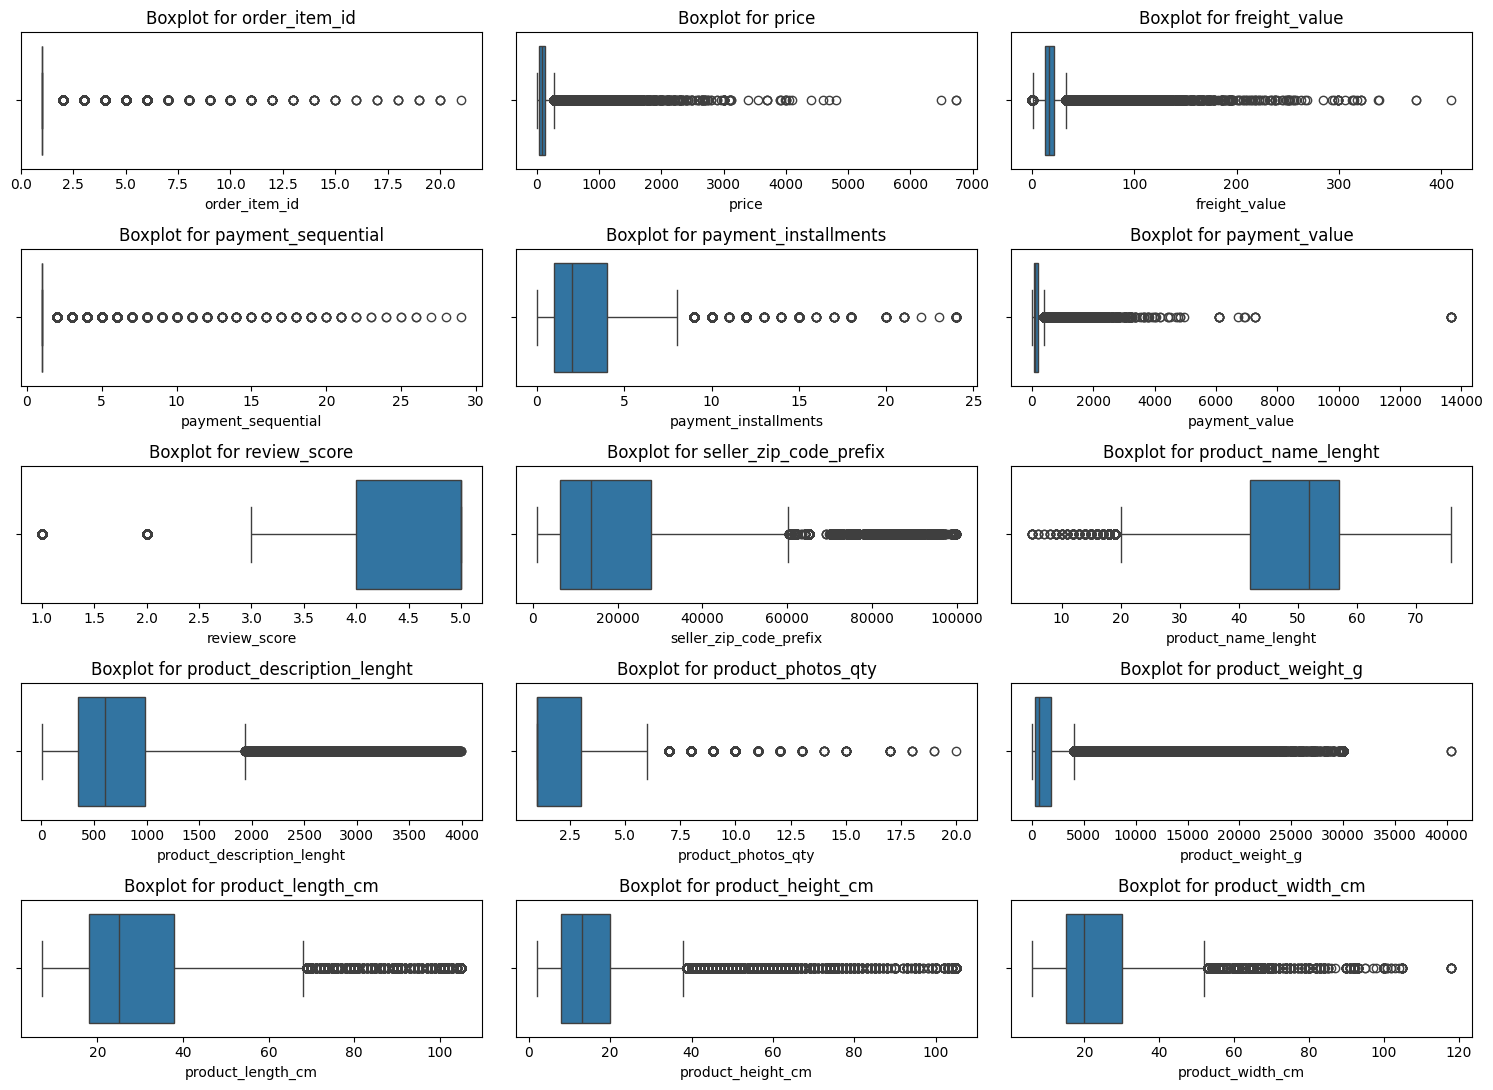

In [22]:
# Tampilkan hasil deteksi outliers menggunakan IQR
display(detect_outliers_iqr(df_combined))

# Plot boxplots untuk kolom dengan outliers
plot_boxplots_for_outliers(df_combined)

**Insight:**

- **Tidak Ada Duplikasi Data**: Tidak ditemukan duplikasi dalam data yang digabungkan, yang menunjukkan bahwa setiap entri dalam dataset adalah unik dan tidak ada pengulangan data.
  
- **Missing Values**: Beberapa kolom memiliki nilai hilang signifikan, seperti **`review_comment_title`** (88%) dan **`review_comment_message`** (58%), yang bisa mempengaruhi analisis sentimen. Kolom **`order_delivered_customer_date`** memiliki **2.87%** data hilang, sedangkan kolom produk seperti **`product_name_length`** dan **`product_description_length`** memiliki **2-3%** nilai hilang. Kolom pembayaran seperti **`payment_value`** dan **`payment_type`** hampir lengkap tanpa missing values.

- **Outlier**: Sebanyak **16.44%** dari **`review_score`** dan **15.30%** dari **`seller_zip_code_prefix`** adalah outlier, menunjukkan variasi yang signifikan. Selain itu, **`product_weight_g`** dengan **14.01%** dan **`order_item_id`** dengan **12.31%** juga memiliki proporsi outlier yang tinggi. Kolom **`price`** dan **`payment_value`** masing-masing mencatat **7.44%** dan **8.09%** outlier, yang perlu diperiksa lebih lanjut untuk kualitas data.

### *Cleaning Data*

In [23]:
# Drop columns with more than 50% missing values
threshold_upper = 0.50  # 50% threshold
df_combined_cleaned = df_combined.dropna(axis=1, thresh=int(len(df_combined) * (1 - threshold_upper)))

# Drop rows with missing values in columns where missing data is below 3%
threshold_lower = 0.03  # 3% threshold
for column in df_combined_cleaned.columns:
    if df_combined_cleaned[column].isnull().mean() < threshold_lower:
        df_combined_cleaned = df_combined_cleaned.dropna(subset=[column])

In [24]:
# Display the shape of the cleaned DataFrame and the columns
display(df_combined_cleaned.shape)
display(df_combined_cleaned.isnull().sum())
print(df_combined_cleaned.columns.tolist())

(113193, 38)

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english']


In [25]:
# df_combined_cleaned.to_csv(os.path.join(dataPath, 'main_clean_data.csv'), index=False)

**<h3>Insight - Data Wrangling:</h3>**


- **Missing Value**: Setelah proses pembersihan, tidak ada lagi nilai hilang di kolom manapun, yang menunjukkan bahwa data sudah bersih dari missing values. Sebelumnya, kolom seperti **`review_comment_title`** dan **`review_comment_message`** memiliki persentase missing value yang sangat tinggi, namun setelah pembersihan, kolom dengan lebih dari **50%** missing values telah dihapus. Selain itu, kolom yang memiliki **kurang dari 3%** missing values tetap dipertahankan setelah dilakukan penghapusan baris dengan missing values di kolom tersebut. Hal ini memastikan bahwa data yang digunakan untuk analisis lebih konsisten dan lengkap.

- **Outlier**: Outlier tidak akan dihapus ataupun diberi label, karena tujuan dari **proyek** ini adalah **analisis**. Oleh karena itu, **outlier** dianggap sebagai bagian yang penting untuk dianalisis sebagai **anomali experience** dalam konteks kali ini. Jika tujuannya adalah pengembangan **Machine Learning** di masa depan, kemungkinan besar outlier **perlu dihapus**.

- **Data Structure**: Data setelah pembersihan terdiri dari **113,193 baris** dan **38 kolom**, yang memberikan informasi yang lebih bersih untuk analisis lebih lanjut, tanpa adanya data yang hilang atau tidak lengkap.

- **Saving Cleaned Data**: Setelah data bersih, selanjutnya adalah **simpan data** pada file baru yaitu **`main_clean_data.csv`** agar dapat diload tanpa harus menajalankan ulang proses data cleaning dengan **repetitif**. Dan data tersebut juga akan digunakan pada pembuatan **Streamlit Dashboard**.

In [26]:
df_combined_cleaned.to_csv(os.path.join(dataPath, 'main_data.csv'), index=False)

## **Exploratory Data Analysis (EDA)**

### *Explore Dataset Structure*
Mengecek ukuran dataset (jumlah baris dan kolom) dan tipe data setiap kolom. Serta Rentang Waktu yang ada pada Dataset

In [66]:
print(f"Rentang waktu order_approved_at: {df_combined_cleaned['order_approved_at'].min()} sampai {df_combined_cleaned['order_approved_at'].max()}")

Rentang waktu order_approved_at: 2016-10-04 09:43:32 sampai 2018-08-29 15:10:26


In [67]:
# Mengecek dimensi dataset dan tipe data
display(df_combined_cleaned.shape)
display(df_combined_cleaned.dtypes)

(113193, 38)

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object
order_item_id,float64
product_id,object


Dataset ini berisi **113,193 baris dan 38 kolom** dengan rentang transaksi dari **4 Oktober 2016 hingga 29 Agustus 2018**. Data mencakup informasi transaksi, produk, penjual, logistik, dan pembayaran, yang memungkinkan analisis pola pembelian, kecepatan pengiriman, serta kepuasan pelanggan.

### *Explore Descriptive Statistics*
Menghitung statistik dasar seperti mean, median, standar deviasi, min, max, dan quantiles untuk kolom numerik. Memahami distribusi data dalam kolom numerik, misalnya harga, jumlah produk, dll.

In [68]:
# Menyajikan statistik deskriptif dasar untuk kolom numerik
numeric_columns = df_combined_cleaned.select_dtypes(include=[np.number]).columns
descriptive_stats = df_combined_cleaned[numeric_columns].describe()

# Menampilkan statistik deskriptif
display(descriptive_stats)

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00
mean,1.20,119.85,20.00,1.09,2.94,171.56,4.08,35085.69,24525.44,48.80,784.73,2.21,2106.24,30.28,16.60,23.10
std,0.69,181.08,15.71,0.69,2.78,264.20,1.35,29867.82,27648.96,10.02,650.33,1.72,3765.21,16.15,13.44,11.74
min,1.00,0.85,0.00,1.00,0.00,0.00,1.00,1003.00,1001.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00
25%,1.00,39.90,13.08,1.00,1.00,60.85,4.00,11310.00,6429.00,42.00,346.00,1.00,300.00,18.00,8.00,15.00
50%,1.00,74.90,16.32,1.00,2.00,107.96,5.00,24315.00,13660.00,52.00,600.00,1.00,700.00,25.00,13.00,20.00
75%,1.00,132.98,21.19,1.00,4.00,189.15,5.00,58865.00,28495.00,57.00,982.00,3.00,1800.00,38.00,20.00,30.00
max,21.00,6735.00,409.68,26.00,24.00,13664.08,5.00,99980.00,99730.00,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00


Dataset menunjukkan bahwa **mayoritas pesanan terdiri dari satu item**, dengan harga produk berkisar antara **Rp0,85 hingga Rp6.735,00**, sementara biaya pengiriman bervariasi hingga **Rp409,68**. Sebagian besar pelanggan memilih **1-4 kali cicilan**, dengan **nilai pembayaran rata-rata Rp171,56**. Rata-rata skor ulasan adalah **4,08**, menunjukkan kepuasan pelanggan yang relatif tinggi. Dimensi produk dan berat sangat bervariasi, dengan beberapa produk memiliki **berat ekstrem hingga 40.425 gram**, yang dapat mempengaruhi biaya serta waktu pengiriman.

### *Explore Distribusi Kolom Numerik*

<Figure size 1200x600 with 0 Axes>

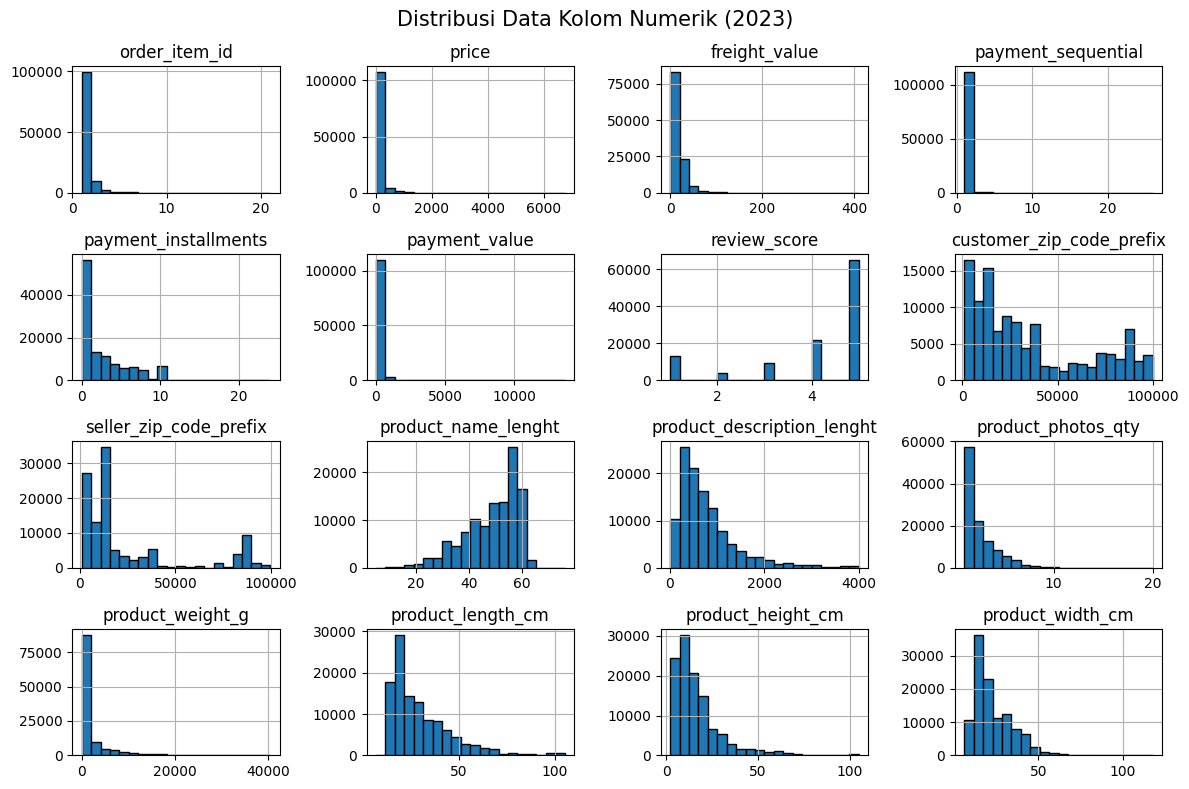

In [69]:
# Visualisasi distribusi data untuk kolom numerik
plt.figure(figsize=(12, 6))
df_combined_cleaned[numeric_columns].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribusi Data Kolom Numerik (2023)', fontsize=15)
plt.tight_layout()
plt.show()

Sebagian besar fitur numerik, seperti **price, freight_value, payment_installments,** dan **product_weight_g**, menunjukkan distribusi **skewed ke kanan**, menandakan adanya nilai ekstrem yang jauh lebih tinggi dari mayoritas data. **Review_score** lebih tersebar, dengan dominasi rating **5**, mencerminkan kepuasan pelanggan tinggi. Sementara itu, **order_item_id** dan **payment_sequential** mayoritas bernilai rendah, menunjukkan transaksi umumnya hanya mencakup satu item dan satu kali pembayaran. Kehadiran **outlier signifikan** dapat mempengaruhi interpretasi data dalam model atau keputusan bisnis.

### *Explore Distribusi Rating Review*

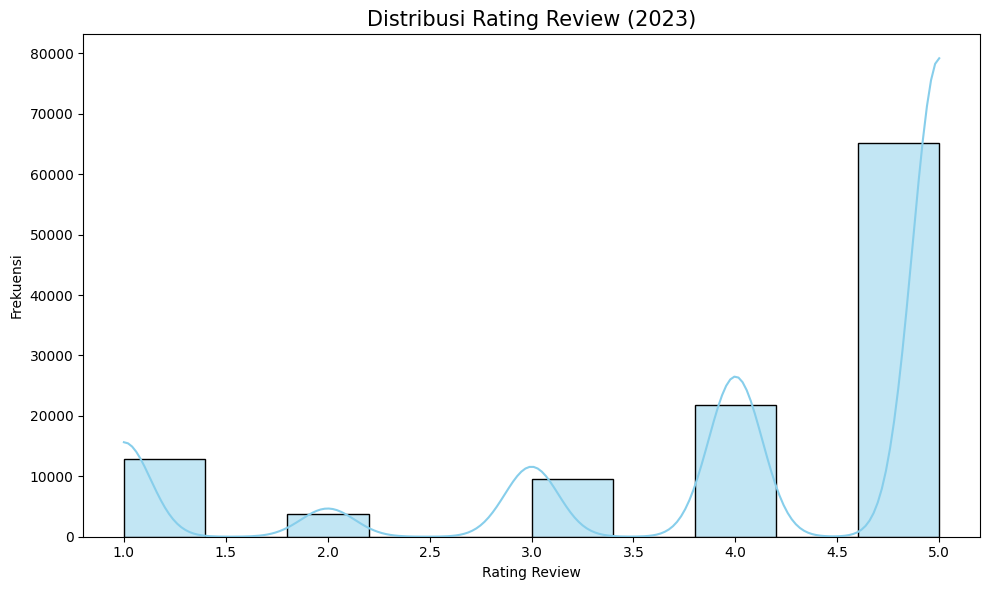

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined_cleaned['review_score'], kde=True, color='skyblue', bins=10)
plt.title('Distribusi Rating Review (2023)', fontsize=15)
plt.xlabel('Rating Review')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Distribusi rating review menunjukkan bahwa mayoritas pelanggan memberikan **rating 5**, mengindikasikan kepuasan yang tinggi terhadap produk dan layanan. Namun, terdapat juga kelompok pelanggan yang memberikan **rating 1**, yang menunjukkan ketidakpuasan signifikan. Rating **2 dan 3 memiliki frekuensi yang jauh lebih rendah**, mengindikasikan bahwa pelanggan cenderung memberikan penilaian yang sangat baik atau sangat buruk, dengan sedikit yang berada di tengah-tengah. Hal ini mengindikasikan bahwa pengalaman pelanggan cenderung ekstrem, baik sangat memuaskan atau sangat mengecewakan.

### *Explore Korelasi Antar Kolom Numerik*

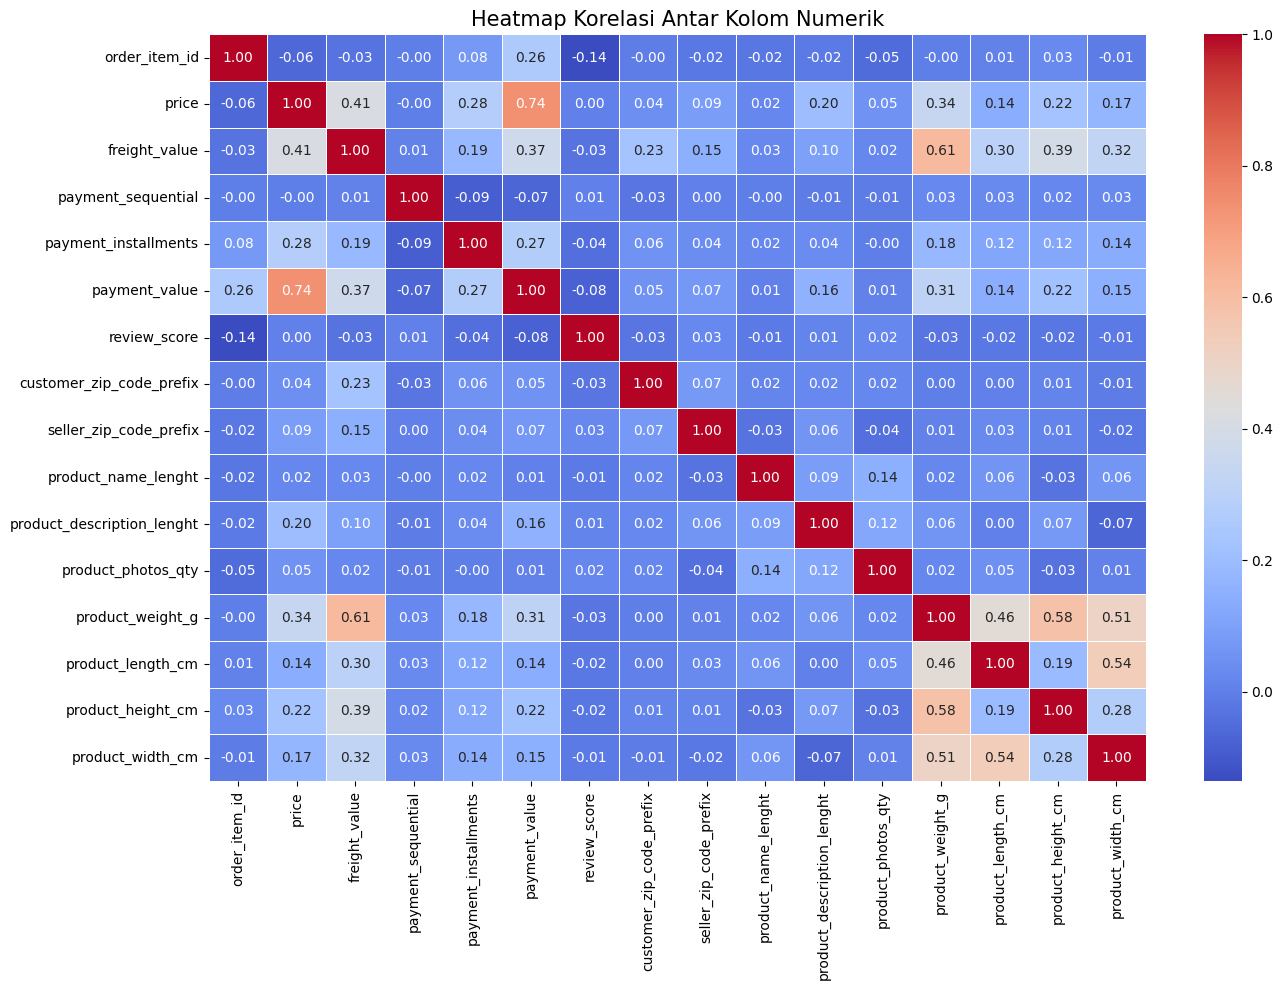

In [71]:
# Menghitung korelasi antar kolom numerik
corr_matrix = df_combined_cleaned[numeric_columns].corr()

# Visualisasi korelasi antar kolom numerik
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik', fontsize=15)
plt.tight_layout()
plt.show()

Heatmap korelasi menunjukkan hubungan kuat antara **harga (price) dan nilai pembayaran (payment_value) sebesar 0.74**, yang mengindikasikan bahwa semakin tinggi harga produk, semakin besar jumlah pembayaran. **Freight_value (biaya pengiriman) juga memiliki korelasi cukup tinggi dengan berat produk (0.61)**, yang menunjukkan bahwa pengiriman lebih mahal untuk produk yang lebih berat. Selain itu, variabel dimensi produk seperti **product_length_cm, product_height_cm, dan product_width_cm** memiliki korelasi yang cukup signifikan satu sama lain, yang masuk akal karena produk dengan ukuran lebih besar cenderung memiliki karakteristik dimensi yang berhubungan. Namun, **review_score tidak memiliki korelasi signifikan dengan variabel lainnya**, menunjukkan bahwa faktor lain di luar data numerik ini lebih mempengaruhi kepuasan pelanggan.

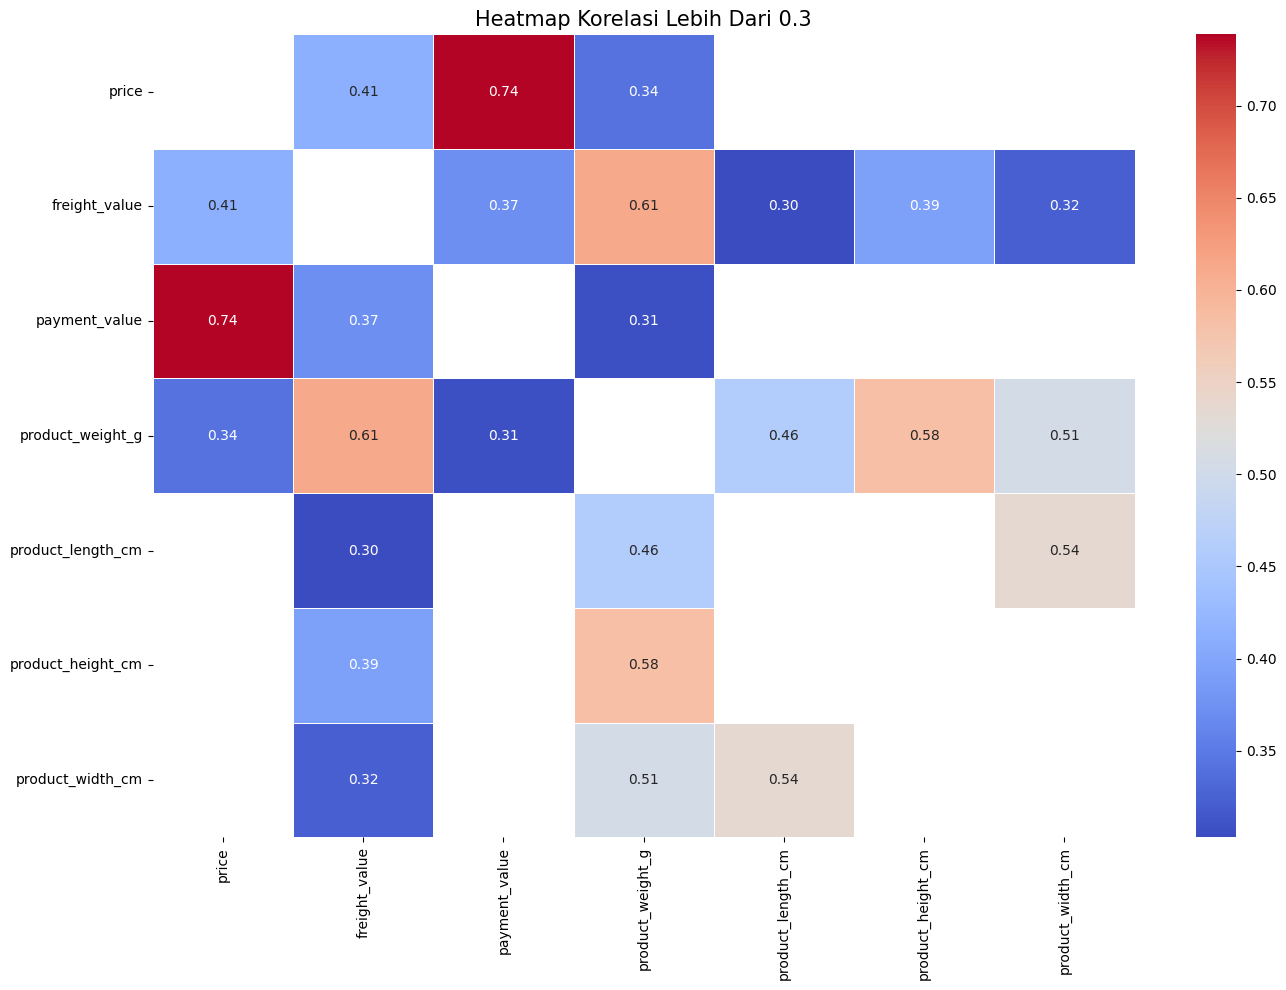

In [72]:
# Filter korelasi yang lebih dari 0.3
high_corr = corr_matrix[(corr_matrix > 0.3) & (corr_matrix != 1.0)]  # Menghindari korelasi dengan dirinya sendiri (1.0)

# Menampilkan korelasi tinggi
high_corr = high_corr.dropna(how='all', axis=1)  # Menghapus kolom yang tidak memiliki korelasi tinggi
high_corr = high_corr.dropna(how='all', axis=0)  # Menghapus baris yang tidak memiliki korelasi tinggi

# Jika Anda ingin menampilkan visualisasi khusus berdasarkan korelasi tinggi
plt.figure(figsize=(14, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Lebih Dari 0.3', fontsize=15)
plt.tight_layout()
plt.show()

### *Explore Nilai Unik dalam Kolom Kategorikal*

In [73]:
# Menampilkan jumlah nilai unik untuk kolom kategorikal
categorical_columns = df_combined_cleaned.select_dtypes(include=['object']).columns
unique_values = {col: df_combined_cleaned[col].nunique() for col in categorical_columns}
print("Jumlah Nilai Unik untuk Setiap Kolom Kategorikal:")
unique_values

Jumlah Nilai Unik untuk Setiap Kolom Kategorikal:


{'order_id': 94471,
 'customer_id': 94471,
 'order_status': 2,
 'order_purchase_timestamp': 93974,
 'order_approved_at': 86571,
 'order_delivered_carrier_date': 78413,
 'order_delivered_customer_date': 93687,
 'order_estimated_delivery_date': 444,
 'product_id': 31474,
 'seller_id': 2907,
 'shipping_limit_date': 89534,
 'payment_type': 4,
 'review_id': 94295,
 'review_creation_date': 626,
 'review_answer_timestamp': 94148,
 'customer_unique_id': 91465,
 'customer_city': 4071,
 'customer_state': 27,
 'seller_city': 587,
 'seller_state': 22,
 'product_category_name': 71,
 'product_category_name_english': 71}

Data menunjukkan **beragam produk (71 kategori), banyaknya pelanggan unik (91.465), dan penjual (2.907)**. Sebagian besar pesanan berstatus **"delivered" atau "canceled"**, dengan transaksi tersebar luas dalam rentang waktu panjang. **Jumlah kota pelanggan (4.071) lebih banyak dibandingkan penjual (587)**, menandakan distribusi geografis pelanggan yang lebih luas daripada penjual.

**<h3>Insight - EDA:</h3>**


- **Dimensi Dataset**: Dataset memiliki 113,193 baris dan 38 kolom, mencakup informasi penting tentang transaksi, produk, dan pelanggan, dengan beberapa kolom kategorikal dan numerik yang dapat memberikan wawasan mendalam terkait penjualan dan kepuasan pelanggan.
- **Statistik Deskriptif**: Kolom **`price`** memiliki harga rata-rata 119.85 dengan variasi besar, sedangkan **`review_score`** rata-rata 4.08, menunjukkan sebagian besar pelanggan puas dengan produk yang mereka beli.
- **Distribusi Data**: Kolom seperti **`order_item_id`** dan **`freight_value`** menunjukkan distribusi yang sangat miring, dengan mayoritas nilai pada kisaran rendah, namun ada nilai ekstrem yang perlu dianalisis lebih lanjut.
- **Korelasi Antar Kolom**: Ada korelasi kuat antara **`price`** dan **`payment_value`** (0.74), yang menunjukkan bahwa harga produk secara langsung mempengaruhi nilai pembayaran dalam transaksi.
- **Nilai Unik dalam Kolom Kategorikal**: Kolom **`product_category_name`** memiliki 71 kategori unik, mengindikasikan keberagaman produk yang dijual dalam berbagai kategori berbeda, sementara **`seller_id`** memiliki 2,907 penjual unik.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1**
***Bagaimana perbandingan tingkat kepuasan pelanggan berdasarkan rating review dengan kategori produk pada tahun 2017?***

#### Visualisasi 1: Top 5 and Bottom 5 Barplot Rata-rata Rating Review Berdasarkan Kategori Produk


In [74]:
# Mengubah kolom 'order_approved_at' menjadi datetime untuk filter tahun 2017
df_combined_cleaned['order_approved_at'] = pd.to_datetime(df_combined_cleaned['order_approved_at'])
df_2017 = df_combined_cleaned[df_combined_cleaned['order_approved_at'].dt.year == 2017]

In [75]:
# Menghitung rata-rata review_score per kategori produk
avg_review_by_category = df_2017.groupby('product_category_name')['review_score'].mean().reset_index()
avg_review_by_category = avg_review_by_category.sort_values(by='review_score', ascending=False)

In [76]:
# Choose the top 5 and bottom 5 categories based on average review score
top_k = 5
bottom_k = 5

# Get top and bottom categories
top_k_categories = avg_review_by_category.head(top_k)
bottom_k_categories = avg_review_by_category.tail(bottom_k)

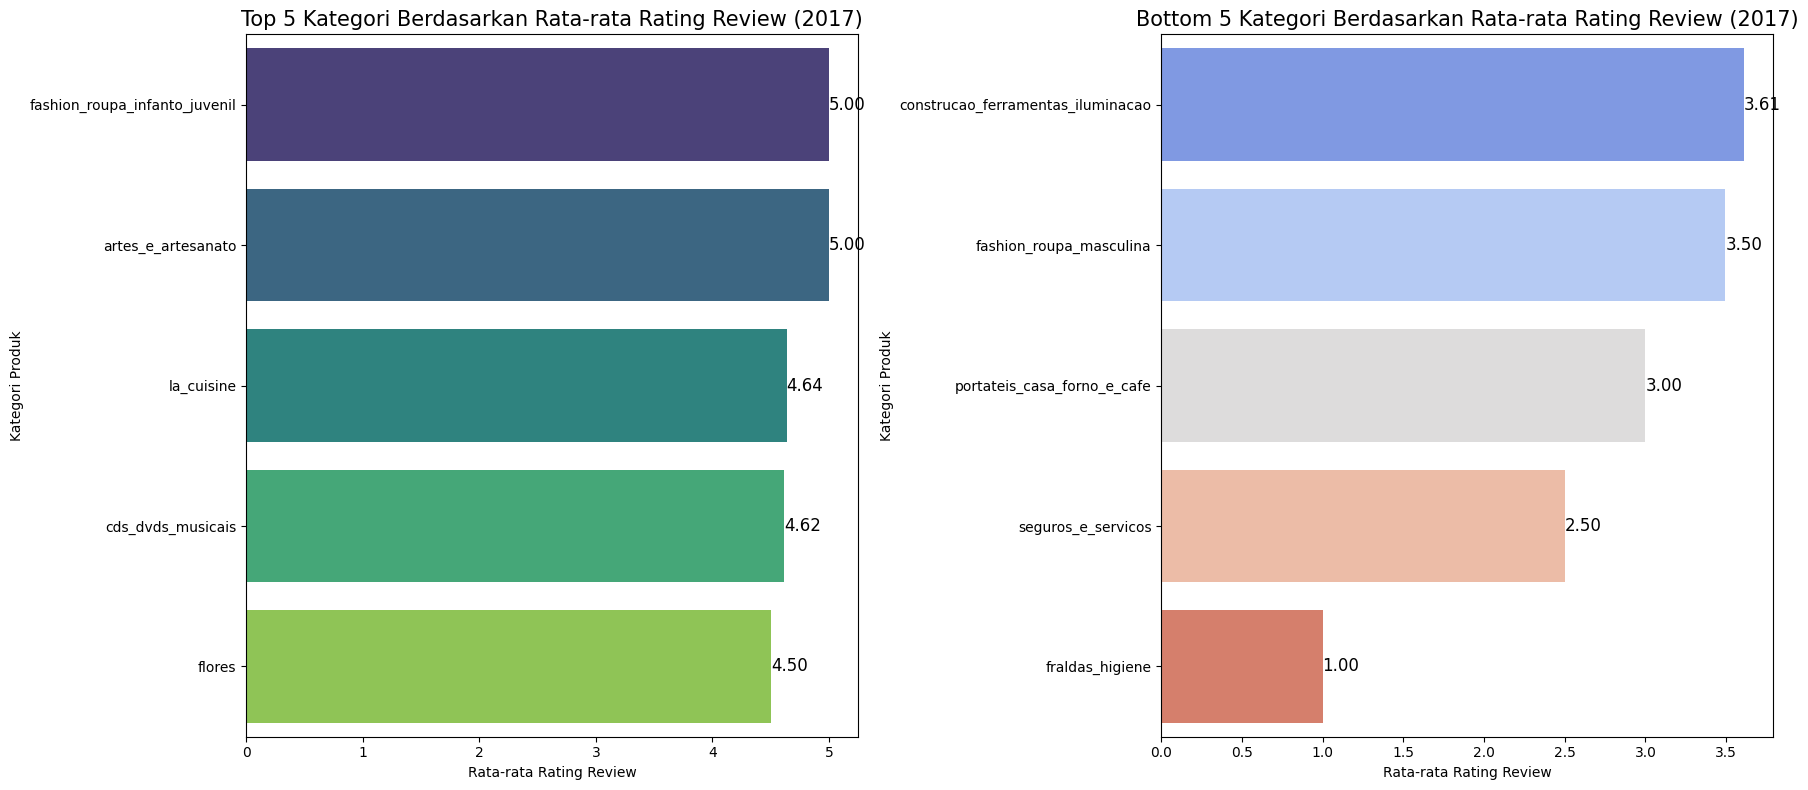

In [77]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Top 5 Categories
ax1 = axes[0]
sns.barplot(x='review_score', y='product_category_name', data=top_k_categories, palette='viridis', ax=ax1)

# Add labels to each bar in top plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=12)

ax1.set_title(f'Top {top_k} Kategori Berdasarkan Rata-rata Rating Review (2017)', fontsize=15)
ax1.set_xlabel('Rata-rata Rating Review')
ax1.set_ylabel('Kategori Produk')

# Plot for Bottom 5 Categories
ax2 = axes[1]
sns.barplot(x='review_score', y='product_category_name', data=bottom_k_categories, palette='coolwarm', ax=ax2)

# Add labels to each bar in bottom plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_width():.2f}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=12)

ax2.set_title(f'Bottom {bottom_k} Kategori Berdasarkan Rata-rata Rating Review (2017)', fontsize=15)
ax2.set_xlabel('Rata-rata Rating Review')
ax2.set_ylabel('Kategori Produk')

plt.tight_layout()
plt.show()

#### Visualisasi 2: Boxplot Distribusi Rating Review Berdasarkan Kategori Produk

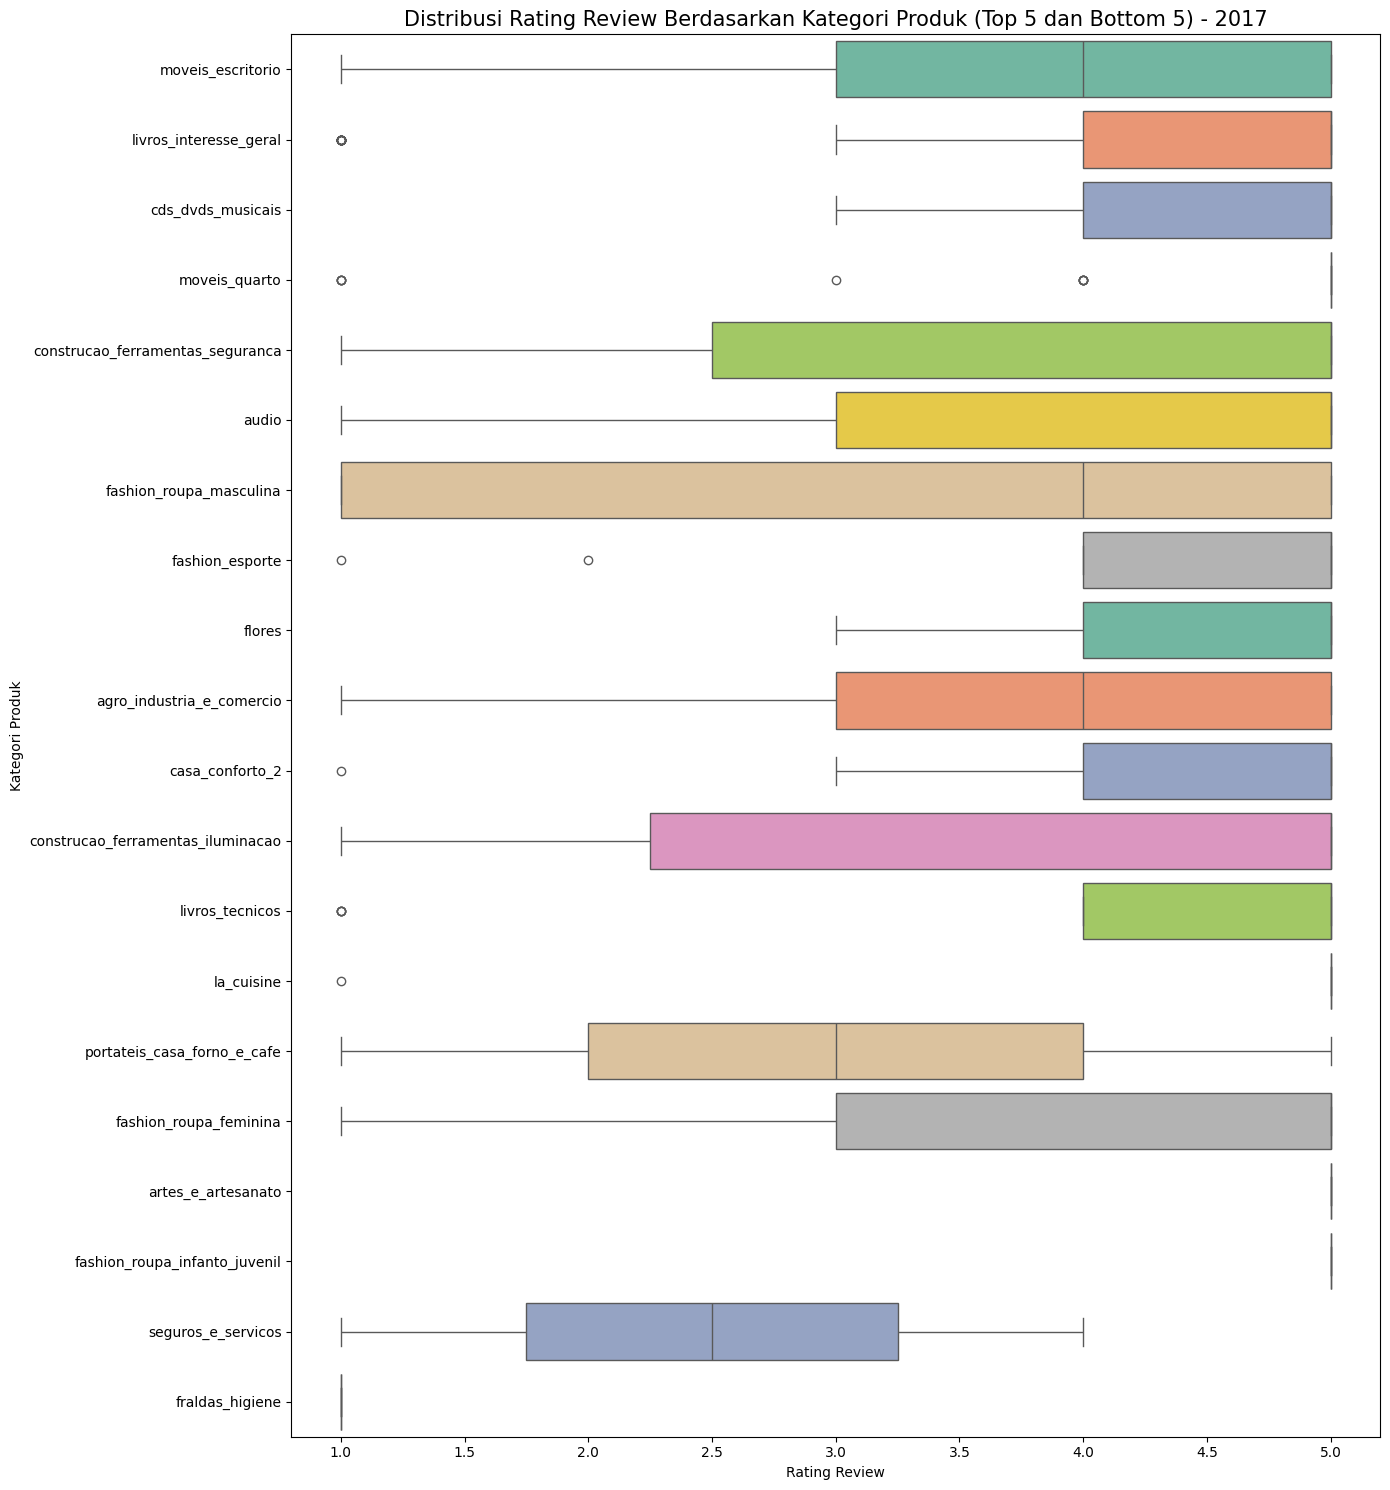

In [78]:
# Get top 10 and bottom 10 categories based on average review score
top_k = 10
bottom_k = 10

# Get the top and bottom categories based on average review score
top_k_categories = avg_review_by_category.head(top_k)['product_category_name'].tolist()
bottom_k_categories = avg_review_by_category.tail(bottom_k)['product_category_name'].tolist()

# Filter the DataFrame to include only top and bottom categories
filtered_df = df_2017[df_2017['product_category_name'].isin(top_k_categories + bottom_k_categories)]

# Create the boxplot for top and bottom categories
plt.figure(figsize=(14, 15))
sns.boxplot(x='review_score', y='product_category_name', data=filtered_df, palette='Set2')
plt.title('Distribusi Rating Review Berdasarkan Kategori Produk (Top 5 dan Bottom 5) - 2017', fontsize=15)
plt.xlabel('Rating Review')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

**<h3>Insight - Menjawab Pertanyaan 2:</h3>**


- **Insight Visualisasi 2:Top 5 dan Bottom 5 Barplot Rata-rata Rating Review Berdasarkan Kategori Produk (2017)**

> Dari **Top 5 kategori produk**, terlihat bahwa kategori seperti **fashion_roupa_infanto_juvenil** dan **artes_e_artesanato** masing-masing memiliki **rating review rata-rata 5.00**, menunjukkan kepuasan pelanggan yang sangat tinggi dan konsistensi dalam ulasan positif. Sebaliknya, kategori **Bottom 5** menunjukkan **rating review yang lebih rendah** dengan kategori seperti **fraldas_higiene** yang hanya mencatat **1.00** sebagai rata-rata, menandakan ketidakpuasan pelanggan yang ekstrem. Hal ini jelas menunjukkan bahwa kategori dengan rating tinggi memiliki pengalaman pelanggan yang memuaskan, sedangkan kategori dengan rating rendah (seperti **seguros_e_servicos** yang mencatat **2.50**) memerlukan perbaikan mendalam untuk meningkatkan kualitas produk dan layanan.

- **Insight Visualisasi 2: Boxplot Distribusi Rating Review Berdasarkan Kategori Produk (Top 5 dan Bottom 5)**

> Pada **Top 5 kategori produk**, distribusi rating review tersebar dengan sangat rapat di sekitar **rating 5.00**, yang mengindikasikan bahwa mayoritas ulasan pelanggan sangat puas dan tidak terdapat **outliers** yang signifikan. Misalnya, kategori **fashion_roupa_infanto_juvenil** menunjukkan distribusi yang konsisten, dengan sedikit variasi. Di sisi lain, **Bottom 5 kategori produk** menunjukkan distribusi yang lebih lebar dan adanya **outliers**, terutama pada kategori **fraldas_higiene** yang menunjukkan banyak ulasan dengan **rating 1**, menandakan masalah kualitas yang signifikan atau ketidakpuasan yang besar. Kategori dengan **rating 3.00** seperti **portateis_casa_formo_e_cafe** menunjukkan ketidakpastian yang lebih besar dalam kepuasan pelanggan, yang membutuhkan perhatian khusus dalam meningkatkan kualitas produk atau pengalaman pelanggan.

### Pertanyaan 2:
***Apa saja faktor yang mempengaruhi waktu pengiriman produk, dan bagaimana pengaruhnya terhadap kepuasan pelanggan pada periode 2017?***

#### Visualisasi 1: Scatter Plot Waktu Pengiriman vs Rating Review

In [79]:
# Menghitung waktu pengiriman (dalam hari)
df_2017['order_approved_at'] = pd.to_datetime(df_2017['order_approved_at'])
df_2017['order_delivered_customer_date'] = pd.to_datetime(df_2017['order_delivered_customer_date'])
df_2017['shipping_time'] = (df_2017['order_delivered_customer_date'] - df_2017['order_approved_at']).dt.days

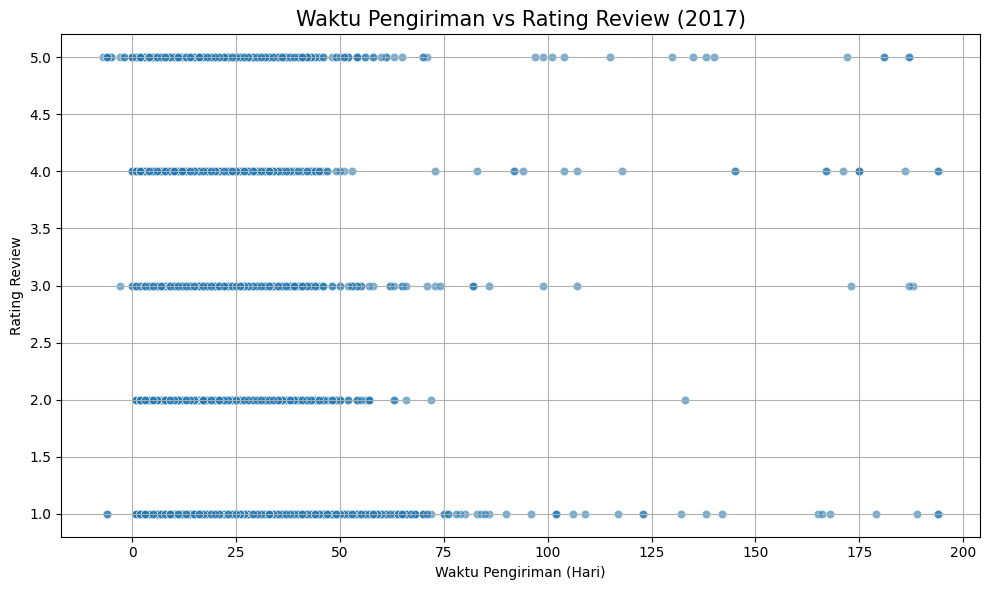

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='review_score', data=df_2017, alpha=0.6)
plt.title('Waktu Pengiriman vs Rating Review (2017)', fontsize=15)
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Rating Review')

# Enabling the grid
plt.grid(True)

plt.tight_layout()
plt.show()

#### Visualisasi 2: Top 5 dan Bottom 5 Kategori Produk Berdasarkan Rata-rata Waktu Pengiriman (2017)

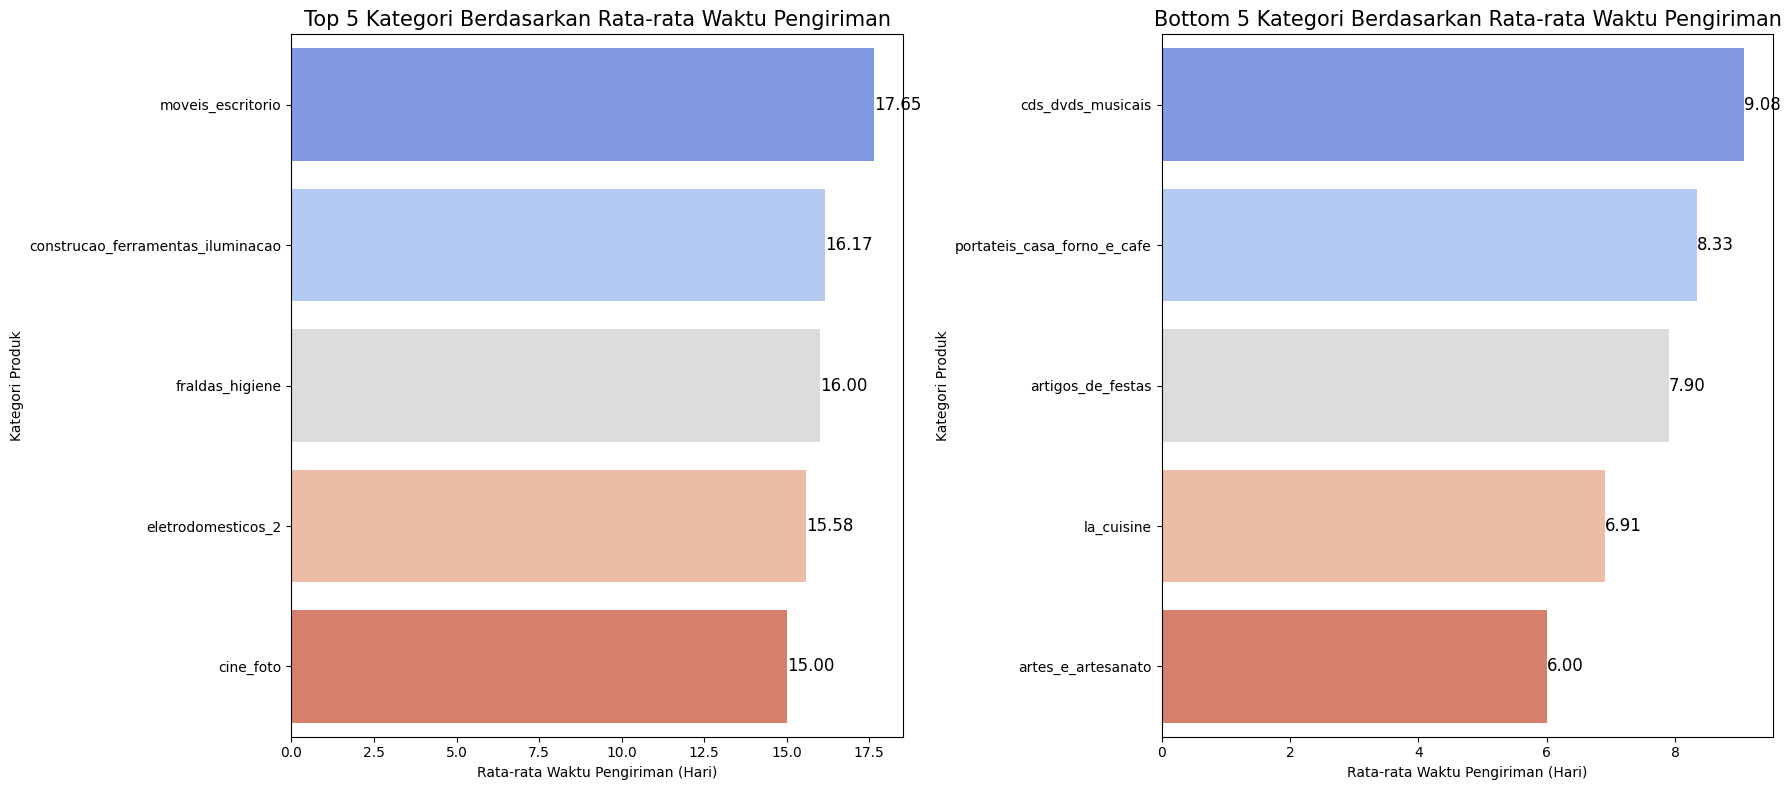

In [81]:
avg_shipping_time_by_category = df_2017.groupby('product_category_name')['shipping_time'].mean().reset_index()
avg_shipping_time_by_category = avg_shipping_time_by_category.sort_values(by='shipping_time', ascending=False)

# Choose the top k and bottom k categories based on average shipping time
top_k = 5
bottom_k = 5

# Get top k and bottom k categories based on average shipping time
top_k_shipping_time = avg_shipping_time_by_category.head(top_k)
bottom_k_shipping_time = avg_shipping_time_by_category.tail(bottom_k)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Top k Categories
ax1 = axes[0]
sns.barplot(x='shipping_time', y='product_category_name', data=top_k_shipping_time, palette='coolwarm', ax=ax1)

# Add labels to each bar in the top plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=12)

ax1.set_title(f'Top {top_k} Kategori Berdasarkan Rata-rata Waktu Pengiriman', fontsize=15)
ax1.set_xlabel('Rata-rata Waktu Pengiriman (Hari)')
ax1.set_ylabel('Kategori Produk')

# Plot for Bottom k Categories
ax2 = axes[1]
sns.barplot(x='shipping_time', y='product_category_name', data=bottom_k_shipping_time, palette='coolwarm', ax=ax2)

# Add labels to each bar in the bottom plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_width():.2f}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=12)

ax2.set_title(f'Bottom {bottom_k} Kategori Berdasarkan Rata-rata Waktu Pengiriman', fontsize=15)
ax2.set_xlabel('Rata-rata Waktu Pengiriman (Hari)')
ax2.set_ylabel('Kategori Produk')

plt.tight_layout()
plt.show()

**<h3>Insight - Menjawab Pertanyaan 2:</h3>**


- **Insight dari Visualisasi 1: Scatter Plot Waktu Pengiriman vs Rating Review (2017)**



>   Dari **scatter plot** yang menunjukkan hubungan antara **waktu pengiriman** dan **rating review** pada tahun 2017, dapat dilihat bahwa sebagian besar ulasan dengan **rating tinggi (4.0 - 5.0)** cenderung memiliki **waktu pengiriman yang relatif singkat (0-50 hari)**. Namun, ada juga beberapa ulasan dengan **rating rendah (1.0 - 2.0)** yang terjadi dengan **waktu pengiriman lebih panjang**, menunjukkan bahwa waktu pengiriman yang lebih lama dapat berdampak pada ketidakpuasan pelanggan. Misalnya, banyak ulasan dengan **rating 1.0** terdistribusi pada **waktu pengiriman yang lebih lama**, mengindikasikan bahwa pelanggan merasa kecewa dengan keterlambatan pengiriman. Sementara itu, **rating 5.0** sebagian besar terdistribusi pada pengiriman yang lebih cepat, menunjukkan bahwa pengiriman yang tepat waktu memiliki pengaruh positif terhadap kepuasan pelanggan.



- **Insight dari Visualisasi 2: Top 5 dan Bottom 5 Kategori Produk Berdasarkan Rata-rata Waktu Pengiriman (2017)**

>   Dalam **Top 5 kategori produk** dengan **rata-rata waktu pengiriman** tercepat, kategori **moveis_escritorio** mencatatkan **rata-rata waktu pengiriman 17.65 hari**, yang menunjukkan pengiriman relatif cepat dibandingkan kategori lain. Kategori lain seperti **construcao_ferramentas_iluminacao** dan **fraldas_higiene** juga memiliki waktu pengiriman yang cepat sekitar **16 hari**. Sebaliknya, pada **Bottom 5 kategori produk**, terlihat bahwa kategori seperti **cds_dvds_musicais** dan **portateis_casa_forno_e_cafe** memiliki **rata-rata waktu pengiriman yang lebih lama** yaitu sekitar **8-9 hari**. **La_cuisine** dan **artigos_de_festas** memiliki **rata-rata waktu pengiriman 6-7 hari**, yang menunjukkan bahwa meskipun mereka memiliki waktu pengiriman yang lebih cepat dibandingkan kategori lain, mereka masih termasuk dalam kelompok dengan waktu pengiriman yang lebih lambat dibandingkan produk lainnya. Data ini menunjukkan bahwa waktu pengiriman yang lebih cepat dapat meningkatkan efisiensi logistik dan kemungkinan kepuasan pelanggan yang lebih tinggi.

## **Analisis Lanjutan (Opsional)**

### **RFM (Recency, Frequency, Monetary) Analysis**

1. **Recency (R)**: Mengukur berapa hari yang telah berlalu sejak transaksi terakhir pelanggan.
   - Biasanya dihitung dengan melihat tanggal transaksi terakhir dan membandingkannya dengan tanggal saat ini (misalnya, tanggal data diambil).

2. **Frequency (F)**: Mengukur berapa sering pelanggan melakukan transaksi dalam periode tertentu.
   - Dihitung dengan menghitung jumlah transaksi untuk setiap `customer_id`.

3. **Monetary (M)**: Mengukur total pengeluaran pelanggan.
   - Dihitung dengan menjumlahkan harga total dari semua transaksi yang dilakukan pelanggan. Biasanya, total harga dihitung dengan `price + freight_value`.

In [82]:
# Pastikan order_purchase_timestamp dikonversi ke datetime
df_combined_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_combined_cleaned['order_purchase_timestamp'])

In [83]:
# Hitung Recency, Frequency, dan Monetary
current_date = df_combined_cleaned['order_purchase_timestamp'].max()  # Tanggal transaksi terakhir dalam dataset

# 1. Recency - selisih hari antara transaksi terakhir dan transaksi masing-masing pelanggan
df_combined_cleaned['recency'] = (current_date - df_combined_cleaned['order_purchase_timestamp']).dt.days

# 2. Frequency - jumlah transaksi per customer_id
frequency = df_combined_cleaned.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# 3. Monetary - total pengeluaran per customer_id
# Total pengeluaran = price + freight_value
df_combined_cleaned['total_spent'] = df_combined_cleaned['price'] + df_combined_cleaned['freight_value']
monetary = df_combined_cleaned.groupby('customer_id')['total_spent'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

In [84]:
# Gabungkan semua hasilnya ke dalam satu dataframe
rfm = frequency.merge(monetary, on='customer_id')
rfm = rfm.merge(df_combined_cleaned[['customer_id', 'recency']].drop_duplicates(), on='customer_id')

In [85]:
# Menampilkan hasil RFM
rfm.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,287
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149


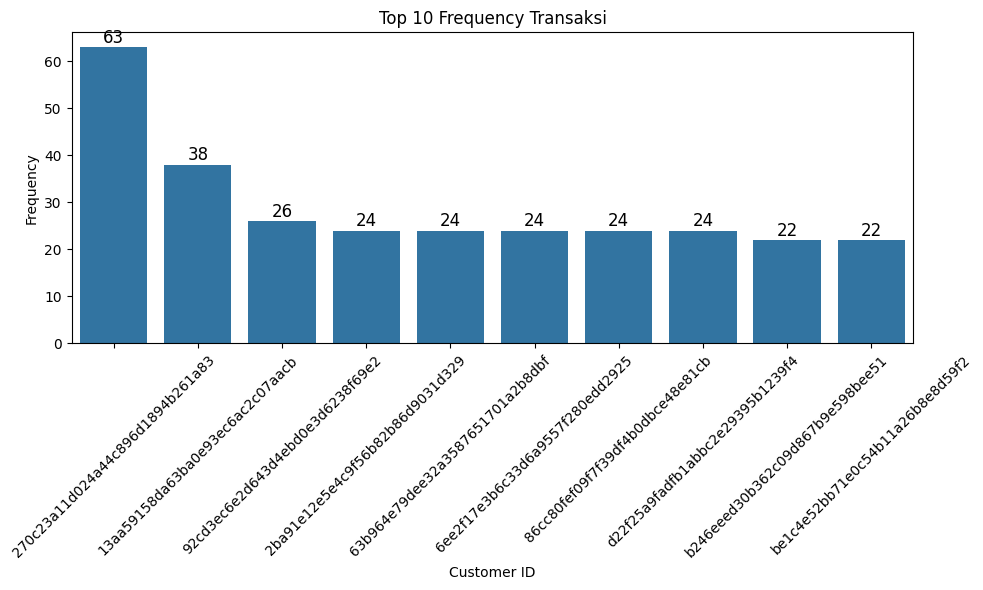

In [86]:
# 1. Top 10 Frequency
top_10_frequency = rfm.nlargest(10, 'frequency')

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='frequency', data=top_10_frequency)
for i in range(len(top_10_frequency)):
    plt.text(i, top_10_frequency['frequency'].iloc[i] + 0.05,
             f'{top_10_frequency["frequency"].iloc[i]}', ha='center', va='bottom', fontsize=12, color='black')
plt.title('Top 10 Frequency Transaksi')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   Pelanggan dengan frekuensi transaksi tertinggi mencapai 63 kali transaksi, sementara pelanggan lainnya dalam daftar top 10 memiliki frekuensi di kisaran 22–38 kali.
*   Distribusi ini menunjukkan bahwa sejumlah kecil pelanggan melakukan pembelian berulang dalam jumlah tinggi, sementara mayoritas pelanggan kemungkinan besar hanya bertransaksi beberapa kali atau bahkan hanya sekali.



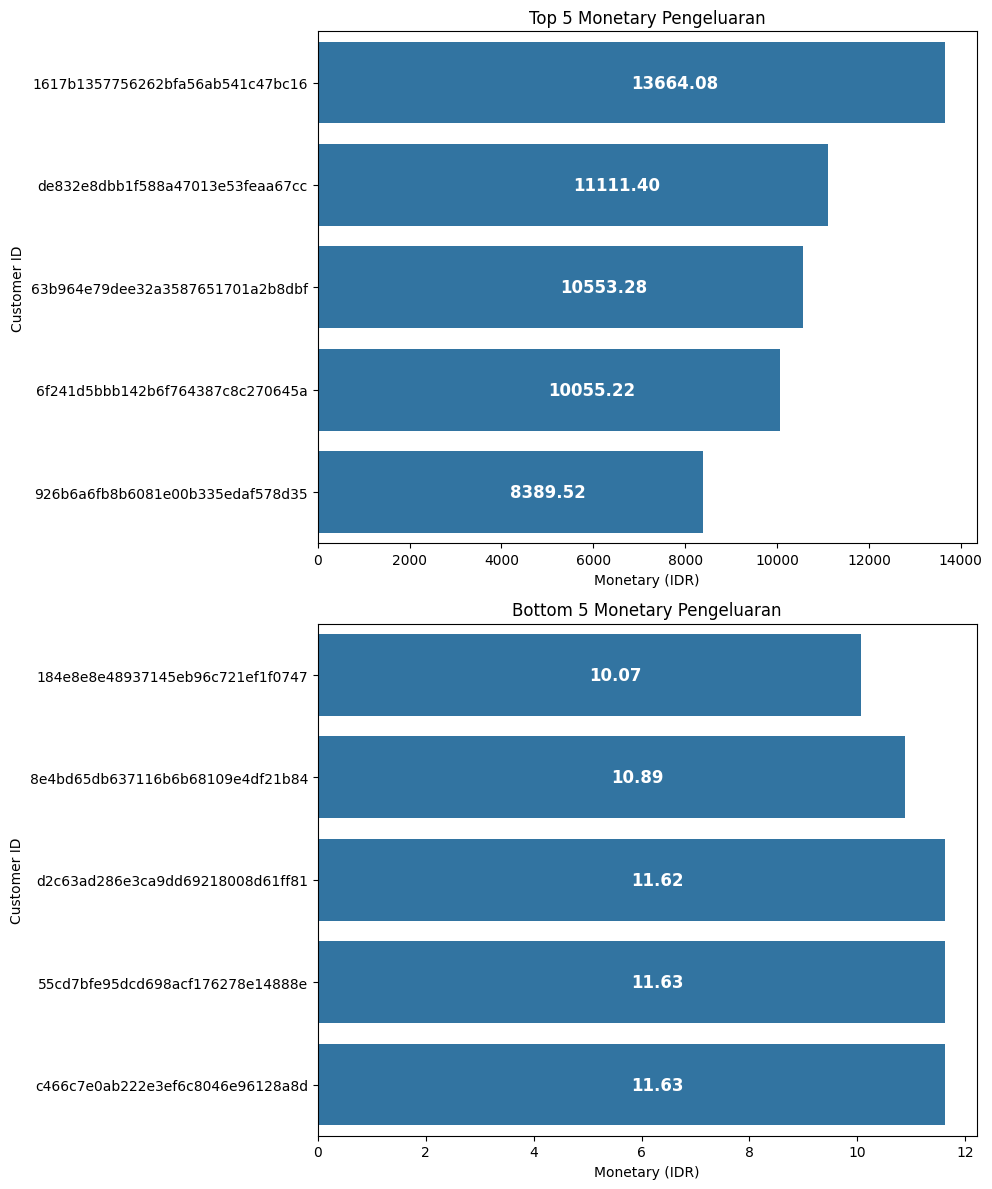

In [87]:
# Top 10 dan Bottom 10 untuk Monetary
top_10_monetary = rfm.nlargest(5, 'monetary')
bottom_10_monetary = rfm.nsmallest(5, 'monetary')

# Subplots Figure for plotting the Top 5 and Bottom 5 Monetary
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Top 5 Monetary
sns.barplot(x='monetary', y='customer_id', data=top_10_monetary, ax=axes[0], orient='h')
for i in range(len(top_10_monetary)):
    axes[0].text(top_10_monetary['monetary'].iloc[i] / 2, i,
                 f'{top_10_monetary["monetary"].iloc[i]:.2f}',
                 va='center', fontsize=12, color='white', fontweight='bold')
axes[0].set_title('Top 5 Monetary Pengeluaran')
axes[0].set_xlabel('Monetary (IDR)')
axes[0].set_ylabel('Customer ID')

# Bottom 5 Monetary
sns.barplot(x='monetary', y='customer_id', data=bottom_10_monetary, ax=axes[1], orient='h')
for i in range(len(bottom_10_monetary)):
    axes[1].text(bottom_10_monetary['monetary'].iloc[i] / 2, i,
                 f'{bottom_10_monetary["monetary"].iloc[i]:.2f}',
                 va='center', fontsize=12, color='white', fontweight='bold')
axes[1].set_title('Bottom 5 Monetary Pengeluaran')
axes[1].set_xlabel('Monetary (IDR)')
axes[1].set_ylabel('Customer ID')

# Layout Adjustments for Subplot
plt.tight_layout()
plt.show()

*   Pelanggan dengan pengeluaran tertinggi mencapai Rp13.664.080, sementara pelanggan dengan pengeluaran terendah hanya sekitar Rp10–Rp12.
*   Ketimpangan ini mengindikasikan adanya segmen pelanggan dengan daya beli tinggi yang melakukan pembelian besar, serta pelanggan dengan daya beli rendah yang kemungkinan hanya mencoba produk dengan pembelian kecil.

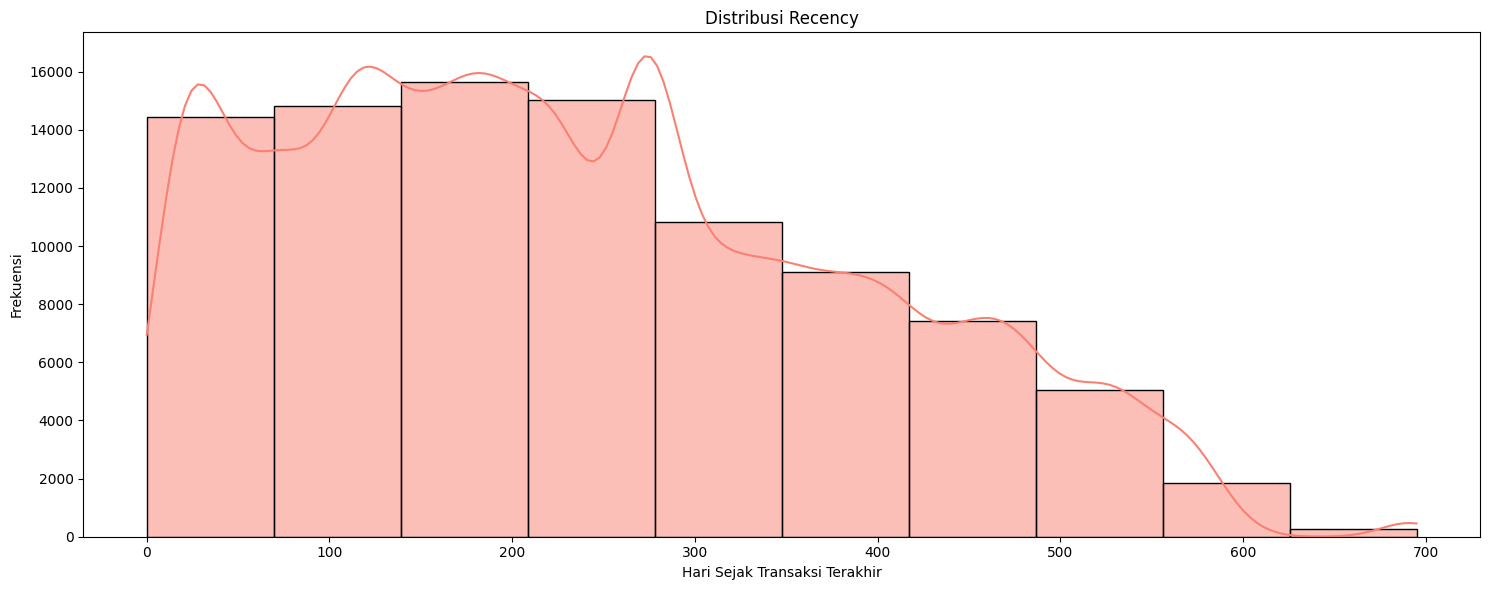

In [88]:
# Recency Distribution (Separate Chart)
plt.figure(figsize=(15, 6))
sns.histplot(rfm['recency'], kde=True, color='salmon', bins=10)
plt.title('Distribusi Recency')
plt.xlabel('Hari Sejak Transaksi Terakhir')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

*   Sebagian besar pelanggan melakukan transaksi terakhir mereka dalam 100–300 hari terakhir, menunjukkan bahwa mayoritas pelanggan masih cukup aktif.
*   Namun, terdapat sejumlah pelanggan yang sudah lebih dari 500 hari tidak melakukan transaksi, yang berpotensi masuk dalam kategori pelanggan yang tidak aktif.


**<h3> Beberapa rekomendasi bisnis yang bisa dilakukan antara lain: </h3>**

1. **Strategi Loyalitas untuk Pelanggan dengan Frekuensi Tinggi**  
   - Berikan **program loyalitas atau VIP membership** kepada pelanggan dengan frekuensi transaksi tinggi untuk mempertahankan mereka.
   - **Personalisasi promosi** dengan memberikan diskon atau voucher eksklusif untuk pembelian selanjutnya.

2. **Strategi Upselling dan Cross-selling untuk Pelanggan dengan Pengeluaran Tinggi**  
   - Pelanggan yang memiliki pengeluaran besar cenderung memiliki daya beli tinggi, sehingga bisa ditargetkan dengan **produk premium atau bundling eksklusif**.
   - Gunakan **strategi pemasaran berbasis rekomendasi** agar mereka tertarik membeli produk lain yang sesuai dengan histori pembeliannya.

3. **Strategi Retensi untuk Pelanggan yang Mulai Tidak Aktif**  
   - Untuk pelanggan yang belum bertransaksi dalam **lebih dari 300 hari**, kirimkan **email re-engagement**, seperti penawaran spesial, diskon eksklusif, atau rekomendasi produk baru.
   - Berikan **insentif cashback atau poin reward** agar mereka kembali melakukan transaksi.

4. **Strategi Konversi untuk Pelanggan dengan Pengeluaran Rendah**  
   - Pelanggan dengan pengeluaran rendah mungkin masih dalam tahap eksplorasi, sehingga bisa diberikan **promo produk pertama** atau **gratis ongkir** agar mereka lebih tertarik melakukan pembelian lebih besar.
   - Berikan edukasi mengenai produk dengan **konten interaktif, demo, atau review pengguna** untuk meningkatkan kepercayaan mereka dalam melakukan transaksi lebih besar.

### **Clustering - With Manual Grouping/Binning**

In [89]:
# Menghitung percentile untuk total_spent dan recency
percentiles_total_spent = df_combined_cleaned['total_spent'].quantile([0.25, 0.50, 0.75])
percentiles_recency = df_combined_cleaned['recency'].quantile([0.25, 0.50, 0.75])

# Mendapatkan nilai percentiles untuk total_spent dan recency
Q1_total_spent = percentiles_total_spent[0.25]
Q2_total_spent = percentiles_total_spent[0.50]
Q3_total_spent = percentiles_total_spent[0.75]

Q1_recency = percentiles_recency[0.25]
Q2_recency = percentiles_recency[0.50]
Q3_recency = percentiles_recency[0.75]

In [90]:
# Fungsi untuk binning berdasarkan percentile pada total_spent
def total_spent_percentile_grouping(row):
    if row['total_spent'] <= Q1_total_spent:
        return 'Rendah Pengeluaran'
    elif Q1_total_spent < row['total_spent'] <= Q3_total_spent:
        return 'Pengeluaran Menengah'
    else:
        return 'Tinggi Pengeluaran'

# Fungsi untuk binning berdasarkan percentile pada recency
def recency_percentile_grouping(row):
    if row['recency'] <= Q1_recency:
        return 'Pelanggan Baru'
    elif Q1_recency < row['recency'] <= Q3_recency:
        return 'Pelanggan Rutin'
    else:
        return 'Pelanggan Tidak Aktif'

# Fungsi untuk binning review_score
def review_score_grouping(row):
    if row['review_score'] == 5:
        return 'Puas'
    elif row['review_score'] in [4, 3]:
        return 'Cukup Puas/Biasa'
    else:
        return 'Tidak Puas'

In [91]:
# Terapkan fungsi binning ke dalam kolom baru
df_combined_cleaned['total_spent_percentile_group'] = df_combined_cleaned.apply(total_spent_percentile_grouping, axis=1)
df_combined_cleaned['recency_percentile_group'] = df_combined_cleaned.apply(recency_percentile_grouping, axis=1)
df_combined_cleaned['review_score_group'] = df_combined_cleaned.apply(review_score_grouping, axis=1)

In [92]:
# Fungsi untuk menampilkan label di setiap bar
def plot_bar_with_labels(ax, data, title, xlabel, ylabel):
    sns.countplot(x=data, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Menambahkan label di setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black', fontweight='bold',
                    xytext=(0, 9), textcoords='offset points')

In [93]:
# Menyiapkan data untuk value_counts
total_spent_groups = df_combined_cleaned['total_spent_percentile_group'].value_counts()
recency_groups = df_combined_cleaned['recency_percentile_group'].value_counts()
review_score_groups = df_combined_cleaned['review_score_group'].value_counts()

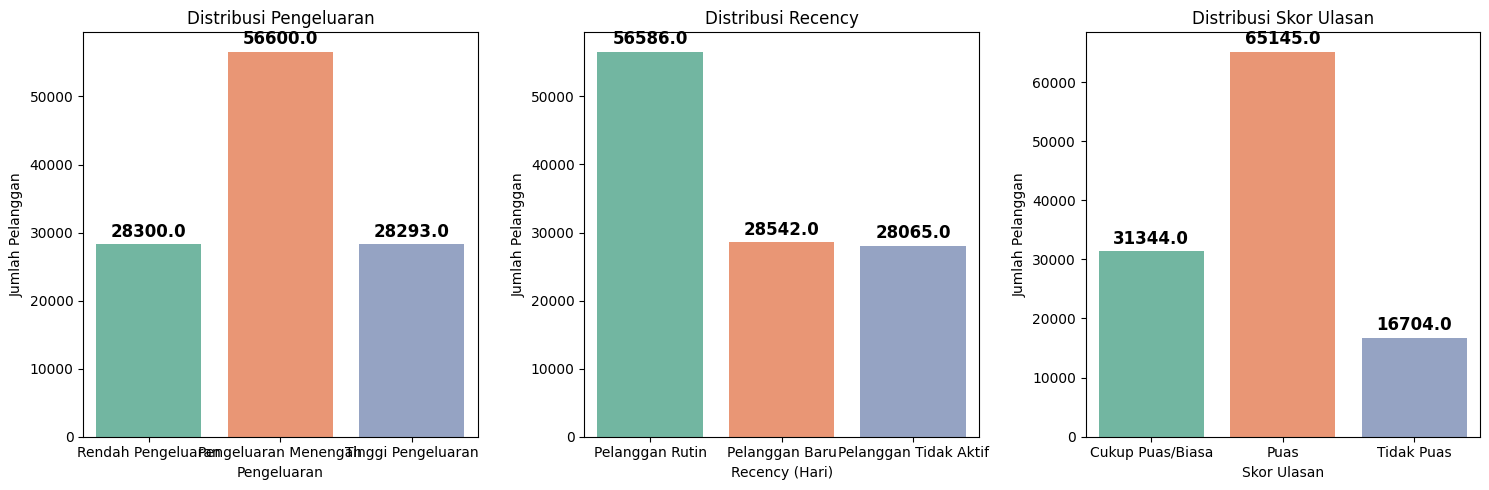

In [94]:
# Membuat subplot dengan 3 bar chart (1x3)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot untuk 'total_spent_percentile_group'
plot_bar_with_labels(axes[0], df_combined_cleaned['total_spent_percentile_group'],
                     'Distribusi Pengeluaran', 'Pengeluaran', 'Jumlah Pelanggan')

# Plot untuk 'recency_percentile_group'
plot_bar_with_labels(axes[1], df_combined_cleaned['recency_percentile_group'],
                     'Distribusi Recency', 'Recency (Hari)', 'Jumlah Pelanggan')

# Plot untuk 'review_score_group'
plot_bar_with_labels(axes[2], df_combined_cleaned['review_score_group'],
                     'Distribusi Skor Ulasan', 'Skor Ulasan', 'Jumlah Pelanggan')

# Layout Adjustments
plt.tight_layout()
plt.show()

**<h3>Insight - Clustering With Manual Grouping/Binning</h3>**

1. **Distribusi Pengeluaran:**
   - Mayoritas pelanggan berada dalam kategori **pengeluaran menengah (56.600 pelanggan)**, menunjukkan bahwa sebagian besar pelanggan tidak berbelanja dalam jumlah kecil atau sangat besar.
   - **Segmen pelanggan dengan pengeluaran rendah (28.300 pelanggan) dan tinggi (28.293 pelanggan) relatif seimbang**, yang menunjukkan adanya dua kelompok pelanggan yang mungkin membutuhkan pendekatan strategi yang berbeda.

2. **Distribusi Recency (Kapan Terakhir Bertransaksi):**
   - **Pelanggan rutin (56.586 pelanggan)** mendominasi, yang menunjukkan bahwa mayoritas pelanggan masih aktif melakukan transaksi dalam periode waktu yang relatif dekat.
   - Namun, terdapat sekitar **28.065 pelanggan yang tergolong tidak aktif**, yang berpotensi mengalami churn dan perlu ditargetkan untuk re-engagement.

3. **Distribusi Skor Ulasan:**
   - **Mayoritas pelanggan (65.145 pelanggan) memberikan rating "puas" (5 bintang)**, menunjukkan bahwa layanan atau produk secara keseluruhan mendapatkan ulasan positif.
   - Namun, **16.704 pelanggan merasa tidak puas**, yang merupakan jumlah signifikan dan perlu dianalisis lebih lanjut untuk mengetahui penyebab utama ketidakpuasan mereka.

**<h3>Rekomendasi Bisnis:</h3>**
1. **Strategi untuk Pelanggan dengan Pengeluaran Rendah**  
   - Berikan **penawaran khusus, bundling produk, atau gratis ongkir** untuk meningkatkan rata-rata nilai transaksi mereka.
   - Lakukan **promosi personalisasi** berdasarkan preferensi pembelian mereka untuk mendorong lebih banyak transaksi.

2. **Strategi untuk Retensi Pelanggan Tidak Aktif**  
   - Kirimkan **email re-engagement dengan diskon eksklusif** untuk pelanggan yang sudah lama tidak bertransaksi.
   - Buat program **loyalty rewards atau cashback** bagi pelanggan yang kembali bertransaksi setelah lama tidak aktif.

3. **Strategi untuk Meningkatkan Kepuasan Pelanggan**  
   - Analisis lebih lanjut alasan **16.704 pelanggan yang tidak puas**, misalnya melalui **analisis ulasan negatif atau pengembalian barang**.
   - Tingkatkan **kualitas layanan pelanggan** dengan memberikan solusi lebih cepat bagi pelanggan yang mengalami masalah.

## **Conclusion**

### **Kesimpulan Pertanyaan Bisnis 1:**
**Bagaimana perbandingan tingkat kepuasan pelanggan berdasarkan rating review dengan kategori produk pada tahun 2017?**

Berdasarkan hasil analisis terhadap data rating review dan kategori produk pada tahun 2017, dapat disimpulkan bahwa tingkat **kepuasan pelanggan** sangat dipengaruhi oleh jenis kategori produk yang dibeli. Produk dalam kategori **fashion_roupa_infanto_juvenil** dan **artes_e_artesanato**, yang mencatatkan rata-rata rating review **5.00**, menunjukkan bahwa kategori produk ini memiliki tingkat kepuasan pelanggan yang sangat tinggi dan konsisten. Sebaliknya, kategori seperti **fraldas_higiene** dengan rata-rata rating **1.00** menunjukkan ketidakpuasan yang sangat signifikan, dengan kemungkinan adanya masalah pada kualitas produk atau pelayanan.

Hasil distribusi rating review juga memperkuat temuan ini, di mana kategori produk dengan rating tinggi menunjukkan distribusi yang sangat sempit di sekitar **rating 5.00**, menandakan kepuasan yang tinggi dan stabil. Sementara itu, kategori dengan rating rendah menunjukkan distribusi yang lebih lebar dan adanya **outliers**, yang menggambarkan ketidakpuasan dan variasi besar dalam pengalaman pelanggan.

**Rekomendasi:** Berdasarkan temuan ini, perusahaan disarankan untuk meningkatkan kualitas produk dalam kategori dengan rating rendah, serta menjaga kualitas dan konsistensi produk dalam kategori dengan rating tinggi untuk mempertahankan kepuasan pelanggan yang sudah tinggi.

### **Kesimpulan Pertanyaan Bisnis 2:**
**Apa saja faktor yang mempengaruhi waktu pengiriman produk, dan bagaimana pengaruhnya terhadap kepuasan pelanggan pada periode 2017?**

Analisis terhadap **waktu pengiriman** dan **kepuasan pelanggan** pada tahun 2017 menunjukkan bahwa **waktu pengiriman yang cepat** memiliki pengaruh yang signifikan terhadap **tingkat kepuasan pelanggan**. Berdasarkan data, ditemukan bahwa pelanggan yang menerima pengiriman produk dalam waktu singkat (0-50 hari) cenderung memberikan **rating review tinggi (4.0 - 5.0)**, sedangkan pelanggan dengan pengiriman yang lebih lama (lebih dari 50 hari) cenderung memberikan **rating rendah (1.0 - 2.0)**.

Selain itu, kategori produk dengan waktu pengiriman cepat, seperti **moveis_escritorio**, memiliki **rata-rata kepuasan yang lebih tinggi**, sementara kategori dengan pengiriman lebih lama, seperti **cds_dvds_musicais**, cenderung mengalami penurunan dalam kepuasan pelanggan. Hal ini menunjukkan bahwa **pengiriman tepat waktu** memiliki korelasi positif yang signifikan terhadap pengalaman pelanggan yang lebih baik.

**Rekomendasi:** Untuk meningkatkan kepuasan pelanggan, perusahaan perlu fokus pada **efisiensi waktu pengiriman** dan mencari cara untuk mempercepat proses pengiriman, terutama untuk kategori produk yang saat ini memiliki waktu pengiriman lebih lama.